# Predicting User Subscription Behavior in an EdTech Startup Using Logistic Regression and Business Intelligence Tools (Continued)

**Business Question**: Can we predict a user’s subscription plan based on their profile, dancer type, learning goals, and genre interests?

**Context**: Understanding subscription behavior is critical to optimizing pricing, targeting, and retention strategies in ed-tech businesses. Your dataset, although lacking behavioral metrics, contains rich intent and user-type attributes. This makes it suitable for multiclass classification, user segmentation, and persona-based marketing strategy.

**Goal**: To develop a logistic regression-based classification model that predicts plan type (e.g., Basic, Standard, Full Access) based on user attributes and learning intent.

**Target Variable**: subscription_plan mapped to discrete categories: Basic, Full Access 7, Full Access 30, Full Access 180 & Full Access 365

# Tools & Libraries Used
- Python
- Pandas
- Numpy
- Matplotlib
- Seaborn
- Jupyter Notebook
- Sklearn
- Scipy

### 1. Import Libraries & Load Data

In [37]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plot
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [32]:
!pip install xgboost

   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
    --------------------------------------- 2.6/149.9 MB 21.4 MB/s eta 0:00:07
   - -------------------------------------- 5.5/149.9 MB 16.0 MB/s eta 0:00:10
   -- ------------------------------------- 7.9/149.9 MB 13.9 MB/s eta 0:00:11
   -- ------------------------------------- 10.7/149.9 MB 13.7 MB/s eta 0:00:11
   --- ------------------------------------ 13.1/149.9 MB 13.3 MB/s eta 0:00:11
   ---- ----------------------------------- 15.5/149.9 MB 13.0 MB/s eta 0:00:11
   ---- ----------------------------------- 17.8/149.9 MB 12.8 MB/s eta 0:00:11
   ----- ---------------------------------- 20.2/149.9 MB 12.7 MB/s eta 0:00:11
   ------ --------------------------------- 23.1/149.9 MB 12.8 MB/s eta 0:00:10
   ------ --------------------------------- 25.7/149.9 MB 12.7 MB/s eta 0:00:10
   ------- -------------------------------- 28.3/149.9 MB 12.7 MB/s eta 0:00:10
   -------- ------------------------------- 31.2/149

In [2]:
df = pd.read_csv('updatedidalsuserdata.csv')

In [4]:
df.head()

,Unnamed: 0,user_id,subscription_plan,plan_expires_at,location,country,created_at,type_of_dancer,genres_of_interest,purpose_of_learning,future_aspirations,full_name,subscribed,subscriptions,repeated_subscriber,signup_month,subscription_end
0,0,1,Free,NaN,"Bharuch, gujarat",India,2021-01-01 10:11:00,Advance,Multi Genre,Career,Freelancer or Professional Dancer,Viraj Suthar,NO,NaN,No,2021-01,NaT
1,1,2,Free,NaN,Thane,India,2021-01-01 10:20:00,Beginner,Multi Genre,Career,Freelancer or Professional Dancer,Prarthana Pawar,NO,NaN,No,2021-01,NaT
2,2,3,Free,NaN,Surat,India,2021-01-01 10:39:00,Intermediate,Single Genre,Passion,Others,Sandip Pariyar,NO,NaN,No,2021-01,NaT
3,3,4,Free,NaN,Korba Chhattisgarh,India,2021-01-01 10:39:00,Intermediate,Multi Genre,Hobby,Choreographer,Harish Kanwar,NO,NaN,No,2021-01,NaT
4,4,5,Free,NaN,Lonavla,India,2021-01-01 10:53:00,Intermediate,Single Genre,Hobby,Choreographer,Tanuj Mehta,NO,NaN,No,2021-01,NaT


In [5]:
# dropping first column

df = df.iloc[:, 1:]

# df.drop(df.columns[0], axis=1, inplace=True)

In [6]:
# data preview

df.head()

,user_id,subscription_plan,plan_expires_at,location,country,created_at,type_of_dancer,genres_of_interest,purpose_of_learning,future_aspirations,full_name,subscribed,subscriptions,repeated_subscriber,signup_month,subscription_end
0,1,Free,NaN,"Bharuch, gujarat",India,2021-01-01 10:11:00,Advance,Multi Genre,Career,Freelancer or Professional Dancer,Viraj Suthar,NO,NaN,No,2021-01,NaT
1,2,Free,NaN,Thane,India,2021-01-01 10:20:00,Beginner,Multi Genre,Career,Freelancer or Professional Dancer,Prarthana Pawar,NO,NaN,No,2021-01,NaT
2,3,Free,NaN,Surat,India,2021-01-01 10:39:00,Intermediate,Single Genre,Passion,Others,Sandip Pariyar,NO,NaN,No,2021-01,NaT
3,4,Free,NaN,Korba Chhattisgarh,India,2021-01-01 10:39:00,Intermediate,Multi Genre,Hobby,Choreographer,Harish Kanwar,NO,NaN,No,2021-01,NaT
4,5,Free,NaN,Lonavla,India,2021-01-01 10:53:00,Intermediate,Single Genre,Hobby,Choreographer,Tanuj Mehta,NO,NaN,No,2021-01,NaT


In [7]:
# checking data types

df.dtypes

user_id                  int64
subscription_plan       object
plan_expires_at         object
location                object
country                 object
created_at              object
type_of_dancer          object
genres_of_interest      object
purpose_of_learning     object
future_aspirations      object
full_name               object
subscribed              object
subscriptions          float64
repeated_subscriber     object
signup_month            object
subscription_end        object
dtype: object

### 2. Predictor Variable Selection
* We are dropping the following columns:
* 1. `location` - contains lot many inconsistent values
  2. `country` - more than 90% of the users are from India indicating low variance
  3. `user_id` - identifier, not useful
  4. `full_name` - personal information identifier, not useful
  5. `plan_expires_at` - outcome leaking info
  6. `subscriptions` - derived from subscription info
  7. `subscribed` - already captured by subscription pla
* Selected Predictor Variables
* 1. `created_at` - time based behavior
  2. `type_of_dancer` - skill level & intent indicator
  3. `genres_of_interest` - user preferences
  4. `purpose_of_learning` - motivation
  5. `future_aspirations` - career goals
  6. `repeated_subscriber` - rentention behavior
  7. `signup_month` - seasonal trends
* Feature engineered from `created_at`:
* 1. `signup_hour`
  2. `signup_day`

### 3. Preprocessing

In [8]:
# converting created_at to datetime and extracting features

df['created_at'] = pd.to_datetime(df['created_at'])

df['signup_hour'] = df['created_at'].dt.hour
df['signup_day'] = df['created_at'].dt.dayofweek

In [10]:
# dropping irrelevant columns

df_clean = df.drop(['user_id', 'plan_expires_at', 'location', 'country', 'created_at', 'full_name', 'subscriptions', 'subscribed', 'subscription_end'], axis=1)

In [11]:
df_clean.head()

,subscription_plan,type_of_dancer,genres_of_interest,purpose_of_learning,future_aspirations,repeated_subscriber,signup_month,signup_hour,signup_day
0,Free,Advance,Multi Genre,Career,Freelancer or Professional Dancer,No,2021-01,10,4
1,Free,Beginner,Multi Genre,Career,Freelancer or Professional Dancer,No,2021-01,10,4
2,Free,Intermediate,Single Genre,Passion,Others,No,2021-01,10,4
3,Free,Intermediate,Multi Genre,Hobby,Choreographer,No,2021-01,10,4
4,Free,Intermediate,Single Genre,Hobby,Choreographer,No,2021-01,10,4


In [12]:
# temporarily encoding categorical variables for assumption checks

df_checks = pd.get_dummies(df_clean, drop_first=True, dtype=int)

In [13]:
df_checks.head()

,signup_hour,signup_day,subscription_plan_Half Yearly,subscription_plan_Monthly,subscription_plan_Weekly,subscription_plan_Yearly,type_of_dancer_Beginner,type_of_dancer_Intermediate,genres_of_interest_Single Genre,purpose_of_learning_Hobby,...,signup_month_2024-10,signup_month_2024-11,signup_month_2024-12,signup_month_2025-01,signup_month_2025-02,signup_month_2025-03,signup_month_2025-04,signup_month_2025-05,signup_month_2025-06,signup_month_2025-07
0,10,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,4,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,10,4,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10,4,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# checking for class imbalance

df['subscription_plan'].value_counts(normalize=True)

subscription_plan
Free           0.880905
Monthly        0.076157
Weekly         0.029953
Yearly         0.009798
Half Yearly    0.003186
Name: proportion, dtype: float64

### Insights:
* Class is highly imbalanced.
* All paid plans combined stands out at ~12% while free plan has a higher majority of 88%.
* We need to handle class imbalance otherwise the model will always predict Free.

In [15]:
from scipy.stats import zscore

# Only check numeric columns like signup_hour, signup_day, etc.
z_scores = zscore(df_clean[['signup_hour', 'signup_day']])
print((abs(z_scores) > 3).sum())  # Outlier count

signup_hour    0
signup_day     0
dtype: int64


In [16]:
df_encoded = pd.get_dummies(df_clean, drop_first=True, dtype=int)

In [17]:
df_encoded.head()

,signup_hour,signup_day,subscription_plan_Half Yearly,subscription_plan_Monthly,subscription_plan_Weekly,subscription_plan_Yearly,type_of_dancer_Beginner,type_of_dancer_Intermediate,genres_of_interest_Single Genre,purpose_of_learning_Hobby,...,signup_month_2024-10,signup_month_2024-11,signup_month_2024-12,signup_month_2025-01,signup_month_2025-02,signup_month_2025-03,signup_month_2025-04,signup_month_2025-05,signup_month_2025-06,signup_month_2025-07
0,10,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,4,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,10,4,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10,4,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### 4. Model Building

In [18]:
# Performing training and test split in 80:20
X = df_encoded.drop(['subscription_plan_Half Yearly', 'subscription_plan_Monthly',
                     'subscription_plan_Weekly', 'subscription_plan_Yearly'], axis=1)

# y = original multiclass target (with string labels)
y = df['subscription_plan']

# Stratified split to preserve class ratios
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

In [19]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (10042, 70)
X_test: (2511, 70)
y_train: (10042,)
y_test: (2511,)


<Axes: xlabel='subscription_plan', ylabel='signup_hour'>

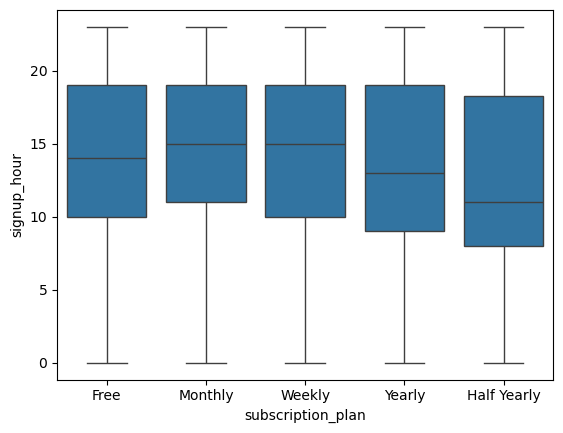

In [20]:
# Visualizing relationship between subscription_plan and signup_hour

sns.boxplot(x='subscription_plan', y='signup_hour', data=df)

### Insights:
* The boxplot shows that most sign-ups and subscriptions occurred between 10 AM and 8 PM IST, which likely aligns with users’ active hours during the day.
* A smaller number of subscriptions happened earlier in the morning, which could be due to either: early risers in India, or users from other time zones (like the United States) subscribing according to their local time, since the dataset timestamps are in IST.

In [21]:
# Training the model
# Need to handle class imbalance by using class_weight

model = LogisticRegression(multi_class='multinomial', class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

In [22]:
# predicting on test set

y_pred = model.predict(X_test)
Y_proba = model.predict_proba(X_test)

Accuracy Score: 0.4647550776583035

Classification Report:
              precision    recall  f1-score   support

        Free       0.93      0.49      0.64      2212
 Half Yearly       0.01      0.38      0.02         8
     Monthly       0.14      0.24      0.17       191
      Weekly       0.05      0.29      0.09        75
      Yearly       0.04      0.48      0.08        25

    accuracy                           0.46      2511
   macro avg       0.24      0.37      0.20      2511
weighted avg       0.84      0.46      0.58      2511



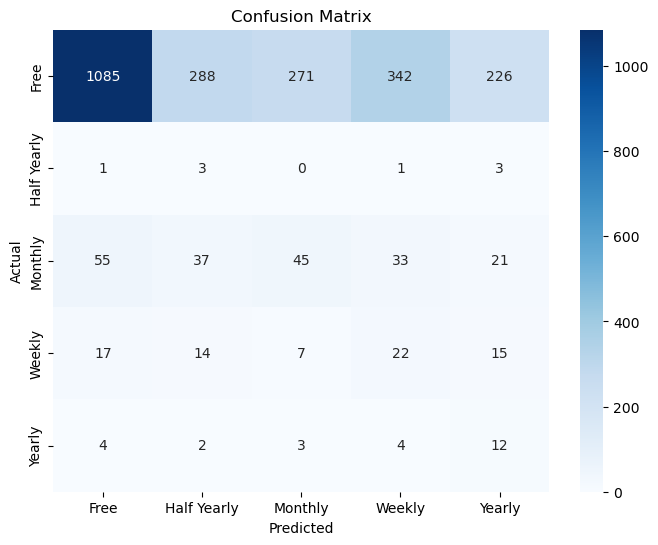

In [23]:
# Accuracy
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plot.xlabel('Predicted')
plot.ylabel('Actual')
plot.title('Confusion Matrix')
plot.show()

### Insights:
* We initially applied a multinomial logistic regression model with class_weight='balanced' to handle the significant class imbalance in the subscription_plan variable.
* Despite this adjustment, the model achieved an overall accuracy of ~46%, heavily skewed toward predicting the dominant class "Free", which accounts for nearly 88% of the dataset.
* The recall and f1-scores for minority classes like Monthly, Weekly, Yearly, and Half-Yearly remain extremely low, indicating poor predictive performance for these categories.
* The confusion matrix shows that the model struggles to distinguish between the subscription plan types, often misclassifying them as "Free".
* These results suggest that:
* 1. The logistic regression model may be too simplistic to capture complex patterns in the data.
  2. The extreme class imbalance limits the model’s ability to learn from underrepresented classes.
  3. Additional steps like trying tree-based models (e.g., Random Forest) or oversampling techniques may be necessary for better performance.

### Random Forest Modeling

In [24]:
# Initialize with class_weight='balanced' to handle class imbalance
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

In [25]:
# fit the model on training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [26]:
# predict the test data
y_pred_rf = rf_model.predict(X_test)

Accuracy Score: 0.8853046594982079

Classification Report:
               precision    recall  f1-score   support

        Free       0.90      0.99      0.94      2212
 Half Yearly       0.00      0.00      0.00         8
     Monthly       0.48      0.21      0.29       191
      Weekly       0.00      0.00      0.00        75
      Yearly       0.00      0.00      0.00        25

    accuracy                           0.89      2511
   macro avg       0.28      0.24      0.25      2511
weighted avg       0.83      0.89      0.85      2511



C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


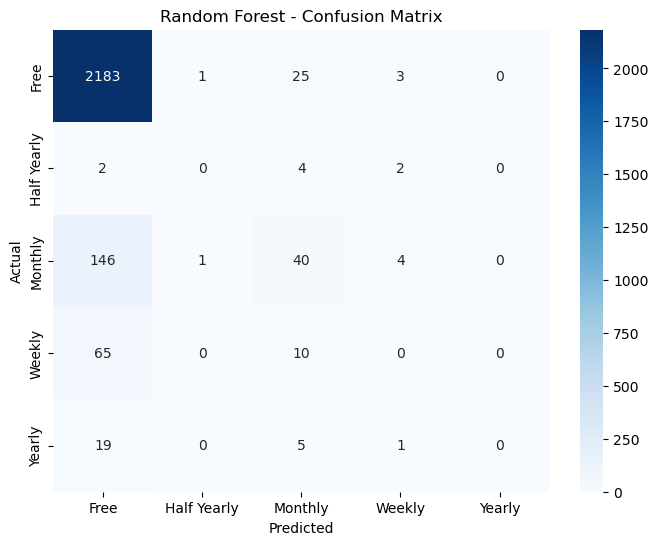

In [27]:
# evaluating the model

# accuracy
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred_rf))

# classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# confusion matrix
plot.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plot.title("Random Forest - Confusion Matrix")
plot.xlabel("Predicted")
plot.ylabel("Actual")
plot.show()

### Insights:
* The model achieved a high overall accuracy of ~88.5%, driven primarily by strong performance in predicting the 'Free' subscription class.
* The 'Free' plan shows exceptional performance with a precision of 0.90, recall of 0.99, and F1-score of 0.94, indicating the model can correctly identify most of these cases.
* However, the model struggles with minority classes:
* 1. 'Monthly', 'Weekly', 'Yearly', and 'Half Yearly' classes have low recall and precision, meaning the model fails to correctly identify many of these subscriptions.
  2. This is likely due to extreme class imbalance (e.g., only 8 users for 'Half Yearly'), despite using class_weight='balanced'.
* The confusion matrix further confirms this — most non-'Free' subscriptions are misclassified as 'Free', showing model bias toward the majority class.

### Hyperparameter Tuning

In [28]:
# defining the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

In [29]:
# initialize the base model
rf = RandomForestClassifier(random_state=42)

# grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)

# fit the model
grid_search.fit(X_train, y_train)

# best estimator
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}



Accuracy Score: 0.8853046594982079

Classification Report:
               precision    recall  f1-score   support

        Free       0.90      0.99      0.94      2212
 Half Yearly       0.00      0.00      0.00         8
     Monthly       0.48      0.21      0.29       191
      Weekly       0.00      0.00      0.00        75
      Yearly       0.00      0.00      0.00        25

    accuracy                           0.89      2511
   macro avg       0.28      0.24      0.25      2511
weighted avg       0.83      0.89      0.85      2511



C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


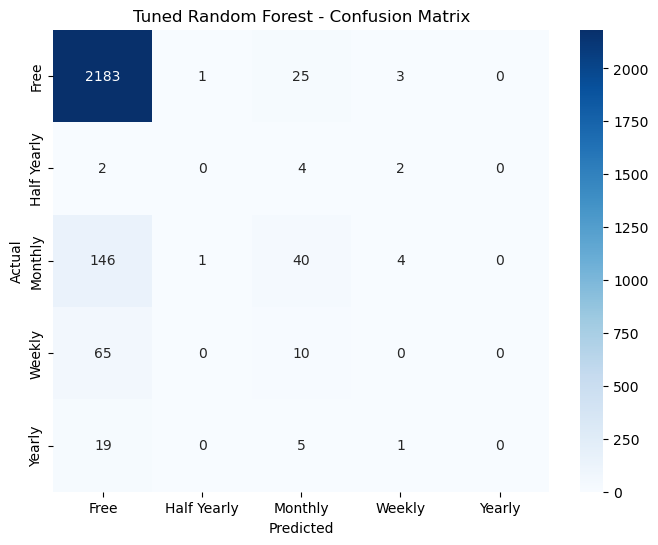

In [30]:
# predict & evaluate
y_pred_rf = best_rf.predict(X_test)

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plot.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_rf.classes_,
            yticklabels=best_rf.classes_)
plot.title("Tuned Random Forest - Confusion Matrix")
plot.xlabel("Predicted")
plot.ylabel("Actual")
plot.show()

### Insights:
* The tuned Random Forest model achieved an accuracy of ~88.5%, which remains consistent with the earlier version, suggesting the model is already performing near its optimal state on this dataset.
* The model performs extremely well for the **Free** plan, with 90% precision and 99% recall. This is expected due to the class imbalance where majority of records belong to **Free** plan.
* The model continues to struggle with predicting **Half Yearly**, **Monthly**, **Weekly** and **Yearly** plans.
* Precision, recall, and F1-scores are very low for these categories, some as low as 0.00.
* The model likely defaults to the dominant class **Free** due to class imbalance, despite using class_weight='balanced'.
* In confusion matrix, many **Weekly** and **Monthly** plans are misclassified as **Free**, indicating difficulty in distinguishing paid plans.
* We can also see almost no correct predictions for **Yearly** and **Half Yearly** plans.

### XGBoost Modeling

In [34]:
# Initializing XGBoost model

xgb_model = XGBClassifier(objective='multi:softmax', num_class=5, eval_metric='mlogloss', use_label_encoder=False, random_state=42)

In [38]:
# Label encoding the target variable

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [39]:
# Fit the model

xgb_model.fit(X_train, y_train_encoded)

C:\Users\Win10\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:22:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=5, ...)

In [40]:
# Making predictions

y_pred = xgb_model.predict(X_test)

Accuracy Score: 0.8932696136997212

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2212
           1       0.00      0.00      0.00         8
           2       0.60      0.18      0.28       191
           3       0.08      0.01      0.02        75
           4       0.00      0.00      0.00        25

    accuracy                           0.89      2511
   macro avg       0.32      0.24      0.25      2511
weighted avg       0.85      0.89      0.86      2511



C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


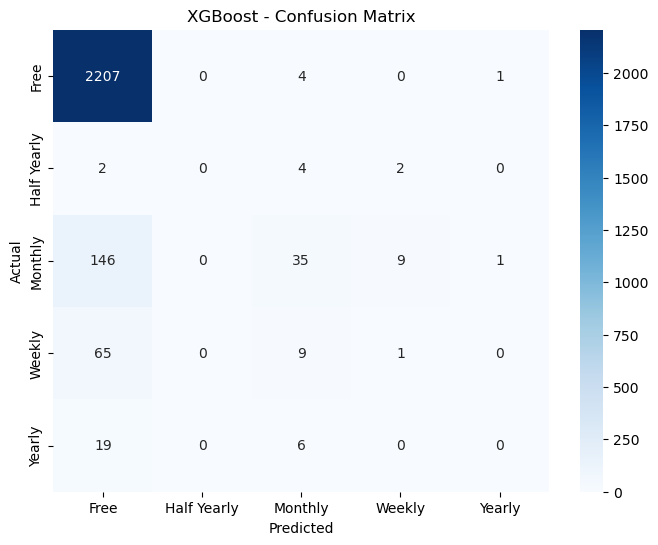

In [43]:
# Evaluation
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy Score:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred)
plot.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plot.title("XGBoost - Confusion Matrix")
plot.xlabel("Predicted")
plot.ylabel("Actual")
plot.show()

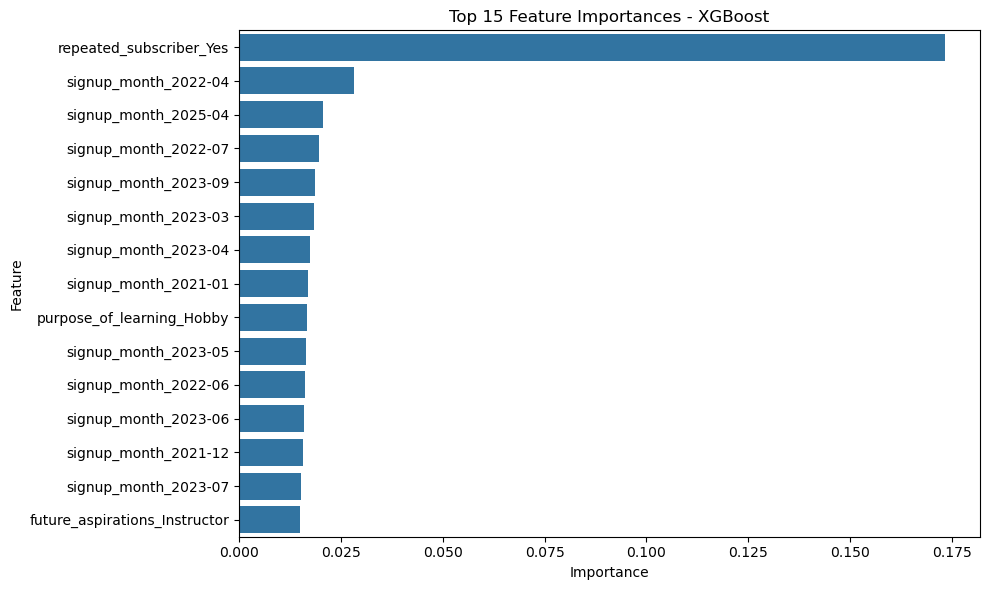

In [45]:
importances = xgb_model.feature_importances_
features = X_train.columns

feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_n = 15  # Change to 10 if you want top 10
top_features = feat_imp_df.head(top_n)

plot.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plot.title(f'Top {top_n} Feature Importances - XGBoost')
plot.xlabel('Importance')
plot.ylabel('Feature')
plot.tight_layout()
plot.show()

### Insights:
* The accuracy score is ~89.32%, which seems high, but this is misleading due to class imbalance.
* Class 0 (Free) has: Precision: 0.90, Recall: 1.00, F1-Score: 0.95 indicating model is excellent in predicting **Free** class.
* All other classes (Half Yearly, Monthly, Weekly, Yearly) have: Very low recall (model missed most of them) & F1-scores near zero, indicating poor predictive ability.
* In confusion matrix, out of 2,511 test samples, 2,207 were predicted as **Free** correctly (True Positives). But, many **Monthly** and **Weekly** actual values were misclassified as **Free**. Some classes like **Yearly** have almost no correct predictions.
* XGBoost is heavily biased towards the **Free** plan (majority class). This is because dataset is imbalanced towards **Free** plans and the features don’t strongly differentiate between subscription types.

### Conclusion:
* In this project, we began with a clean dataset which was imported after performing Exploratory Data Anaylsis. The encoded dataset from a subscription service and applied a variety of machine learning models to predict the user's subscription plan. We followed a structured approach:
* 1. We encoded the cleaned dataset using get_dummies(). Explored the class imbalance in the target variable `subscription_plan` where the **Free** plan dominated.
  2. Modeling Attempts:
     * Started with **Logistic Regression** which was simple, interpretable but biased.
     * Moved to **Random Forest** which improved slightly in recall for minority classes, but still biased.
     * Finally used **XGBoost** with tuned parameters, expecting better handling of imbalance and feature interactions.
  3. Findings:
     * Despite using advanced models, all approaches favored the **Free** plan due to severe class imbalance and lack of strong predictive features.
     * Evaluation metrics like recall and f1-score highlighted how poorly the model performed on non-majority classes.
     * Even XGBoost, a robust algorithm, failed to generalize well across all classes.
* Even the most advanced models like XGBoost can't fix issues rooted in data quality and imbalance. This project underscores the importance of balanced datasets and rich, relevant features for multi-class classification tasks. Without them, models will always lean towards the majority — no matter how powerful they are.